In [24]:
f=open("NLP.txt",'r')
print(f.read())
text=list(f.read().split())

Once upon a midnight dreary, while I pondered, weak and weary,
Over many a quaint and curious volume of forgotten lore –
While I nodded, nearly napping, suddenly there came a tapping,
As of some one gently rapping, rapping at my chamber door –
"'Tis some visitor," I muttered, "tapping at my chamber door –
Only this and nothing more."

Ah, distinctly I remember it was in the bleak December;
And each separate dying ember wrought its ghost upon the floor.
Eagerly I wished the morrow; – vainly I had sought to borrow
From my books surcease of sorrow – sorrow for the lost Lenore –
For the rare and radiant maiden whom the angels name Lenore –
Nameless here for evermore.

And the silken, sad, uncertain rustling of each purple curtain
Thrilled me – filled me with fantastic terrors never felt before;
So that now, to still the beating of my heart, I stood repeating,
"'Tis some visitor entreating entrance at my chamber door –
Some late visitor entreating entrance at my chamber door; –
This it is a

In [3]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [4]:
#Hyperparameters
vocab_size=10000   # Dictionary Size
padding_type='pre'
max_length_=9      # feature Length
oov_tok="<oov>"
emb_dim=16         # Embedding Dimensions

In [5]:
# Tokenizing the Sentences
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(text)
word_index=tokenizer.word_index


In [6]:
sequence=tokenizer.texts_to_sequences(text)

# Data Preprocessing

In [7]:
sequence_new=[]
for i in range(1129):
    sequence_new.append(sequence[i][0])

In [8]:
s=[]
j=0
k=9
for i in range(125):
    s.append(sequence_new[j:k])
    j=k
    k=j+9
    

In [9]:
import numpy as np
import pandas as pd
s=np.array(s)
print(s.shape)

(125, 9)


In [10]:
o=[]
i=[]
k=2
for i in range(125):
    a=s[i]
    k=2
    for j in range(8):
        i=a[0:k]
        o.append(i)
        k=k+1
        

In [11]:
padded=pad_sequences(o,maxlen=max_length_,padding=padding_type)

In [12]:
df=pd.DataFrame(padded)
df.head(8)

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,166,44
1,0,0,0,0,0,0,166,44,10
2,0,0,0,0,0,166,44,10,167
3,0,0,0,0,166,44,10,167,168
4,0,0,0,166,44,10,167,168,98
5,0,0,166,44,10,167,168,98,5
6,0,166,44,10,167,168,98,5,169
7,166,44,10,167,168,98,5,169,170


In [13]:
X=df.drop([8],axis=1)
y=df[8]

In [14]:
import tensorflow.keras.utils as ku 
label=ku.to_categorical(y,num_classes=len(word_index))
xs=np.array(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(xs,label,test_size=0.3)

In [16]:
model=tf.keras.Sequential([  tf.keras.layers.Embedding(vocab_size,128,input_length=(max_length_-1)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                            
                           tf.keras.layers.Dense(len(word_index),activation='softmax')
    
    
    
    
    
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 128)            1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 441)               56889     
Total params: 1,435,705
Trainable params: 1,435,705
Non-trainable params: 0
_________________________________________________________________


In [25]:
history=model.fit(X_train,y_train,epochs=500,verbose=2,validation_data=(X_test,y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/500
700/700 - 1s - loss: 0.0864 - accuracy: 0.9686 - val_loss: 10.1710 - val_accuracy: 0.0733
Epoch 2/500
700/700 - 1s - loss: 0.0840 - accuracy: 0.9657 - val_loss: 10.1827 - val_accuracy: 0.0733
Epoch 3/500
700/700 - 1s - loss: 0.0847 - accuracy: 0.9671 - val_loss: 10.1809 - val_accuracy: 0.0733
Epoch 4/500
700/700 - 1s - loss: 0.0819 - accuracy: 0.9686 - val_loss: 10.1876 - val_accuracy: 0.0667
Epoch 5/500
700/700 - 1s - loss: 0.0820 - accuracy: 0.9657 - val_loss: 10.2056 - val_accuracy: 0.0733
Epoch 6/500
700/700 - 1s - loss: 0.0821 - accuracy: 0.9686 - val_loss: 10.1961 - val_accuracy: 0.0700
Epoch 7/500
700/700 - 1s - loss: 0.0806 - accuracy: 0.9671 - val_loss: 10.2102 - val_accuracy: 0.0733
Epoch 8/500
700/700 - 1s - loss: 0.0797 - accuracy: 0.9657 - val_loss: 10.2092 - val_accuracy: 0.0700
Epoch 9/500
700/700 - 1s - loss: 0.0793 - accuracy: 0.9671 - val_loss: 10.2321 - val_accuracy: 0.0733
Epoch 10/500
700/700 - 1s - loss: 0.

# PLotting loss and Accuracy

Text(0.5,0,'Epochs')

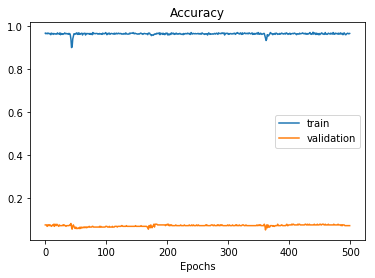

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.title("Accuracy")
plt.xlabel("Epochs")

Text(0.5,0,'Epochs')

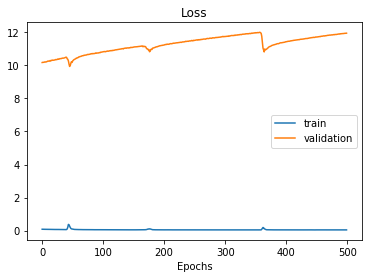

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.title("Loss")
plt.xlabel("Epochs")

# Function to Generate a Poem

In [33]:
def generate_poem(input,length):
    seed_text=input
    output=''
    for i in range(length):
        token_list=tokenizer.texts_to_sequences([seed_text])[0]
        token_list=pad_sequences([token_list],maxlen=8,padding='pre')   # truncating from the beginning
        class1=model.predict_classes(token_list.reshape(1,8))
        for word,index in tokenizer.word_index.items():
            if(class1==index):
                break
        seed_text=seed_text+" "+word
    return(print(seed_text))               

In [34]:
generate_poem("Once upon a midnight dreary, while",20)

Once upon a midnight dreary, while i implore i broken sculptured stillness bore thing of evil – prophet for forget forget melancholy and muttered other burden
